In [1]:
# Import dependencies.
from citipy import citipy
import numpy as np
import pandas as pd
import random
import requests as req
import json
import seaborn as sns
import matplotlib.pyplot as plt

# Import Open Weather Map API keys.
from openWeatherMapApiKeys import apiKey


In [2]:
# Declare variables describing the scope of lat/lng search for cities.
latDim = {'min': -55, 'max': 65}
lngDim = {'min': -180, 'max': 180}

latVals = np.arange(latDim['min'], latDim['max'], 0.1)
lngVals = np.arange(lngDim['min'], lngDim['max'], 0.1)

In [3]:
# Create an empty data frame that will contain details of our randomly selected cities.
cities = 0

colNames = ('cityName', 'countryCode', 'randLat', 'randLng', 'uniqueName', 'Latitude', 'Longitude','Temperature',
            'Humidity','Cloudiness','WindSpeed')
cities = pd.DataFrame(columns = colNames)
cities

,cityName,countryCode,randLat,randLng,uniqueName,Latitude,Longitude,Temperature,Humidity,Cloudiness,WindSpeed


In [4]:
# Query Citipy for random lat long values until we collect our sample.

sampleSize = 500

baseUrl = 'http://api.openweathermap.org/data/2.5/weather?q='
units = 'imperial'

while len(cities) <= sampleSize:
    randLat = random.choice(latVals)
    randLng = random.choice(lngVals)
    city = citipy.nearest_city(randLat, randLng)
    cityName = city.city_name
    countryCode = city.country_code
    if cityName + countryCode in cities.uniqueName.tolist():
        pass
    else:
        url = baseUrl + cityName + ',' + countryCode + '&units=' + units + '&APPID=' + apiKey
        weather_response = req.get(url)
        weather_json = weather_response.json()
        print('Status code: ' + str(weather_json["cod"]) + ' DF Length: ' + str(len(cities)))
        if weather_json["cod"] == 200:
            Latitude = weather_json["coord"]["lat"]
            Longitude = weather_json["coord"]["lon"]
            Temperature = weather_json["main"]["temp"]
            Humidity = weather_json["main"]["humidity"]
            Cloudiness = weather_json["clouds"]["all"]
            WindSpeed = weather_json["wind"]["speed"]
            cities.loc[len(cities)+1] = [cityName, countryCode, randLat, randLng, cityName, Latitude, Longitude, Temperature, Humidity, Cloudiness, WindSpeed]
#             cities = concat(cities, DataFrame([{'cityName': cityName, 'countryCode' : countryCode, 'randLat' : randLat,'randLng' : randLng, 'uniqueName' : cityName, 'Latitude' : Latitude, 'Longitude' : Longitude,'Temperature' : Temperature, 'Humidity' : Humidity,'Cloudiness' : Cloudiness,'WindSpeed' : WindSpeed}])
        else:
            pass


Status code: 200 DF Length: 0
Status code: 200 DF Length: 1
Status code: 200 DF Length: 2
Status code: 200 DF Length: 3
Status code: 200 DF Length: 4
Status code: 200 DF Length: 5
Status code: 200 DF Length: 6
Status code: 200 DF Length: 7
Status code: 200 DF Length: 8
Status code: 200 DF Length: 9
Status code: 200 DF Length: 10
Status code: 200 DF Length: 11
Status code: 200 DF Length: 12
Status code: 200 DF Length: 13
Status code: 200 DF Length: 14
Status code: 200 DF Length: 15
Status code: 200 DF Length: 16
Status code: 200 DF Length: 17
Status code: 200 DF Length: 18
Status code: 200 DF Length: 19
Status code: 200 DF Length: 20
Status code: 200 DF Length: 21
Status code: 200 DF Length: 22
Status code: 200 DF Length: 23
Status code: 200 DF Length: 24
Status code: 200 DF Length: 25
Status code: 200 DF Length: 26
Status code: 200 DF Length: 27
Status code: 200 DF Length: 28
Status code: 200 DF Length: 29
Status code: 200 DF Length: 30
Status code: 200 DF Length: 31
Status code: 200 D

In [5]:
cities

,cityName,countryCode,randLat,randLng,uniqueName,Latitude,Longitude,Temperature,Humidity,Cloudiness,WindSpeed
1,negotin,rs,44.2,22.5,negotin,44.23,22.53,57.73,71.0,0.0,4.38
2,kawalu,id,-11.6,107.2,kawalu,-7.38,108.21,57.28,96.0,36.0,0.92
3,alofi,nu,-22.5,-166.6,alofi,-19.06,-169.92,75.20,94.0,75.0,8.05
4,tiznit,ma,26.3,-10.7,tiznit,29.58,-9.50,77.44,54.0,12.0,2.71
5,castro,cl,-48.7,-104.4,castro,-42.47,-73.77,45.40,100.0,92.0,18.48
6,firozabad,in,27.1,78.5,firozabad,27.15,78.42,81.31,87.0,20.0,5.39
7,nishihara,jp,19.3,138.0,nishihara,26.18,127.76,83.26,79.0,20.0,2.24
8,asau,tv,-4.4,179.8,asau,-8.52,179.13,84.20,83.0,40.0,4.70
9,cap-aux-meules,ca,49.5,-61.4,cap-aux-meules,47.38,-61.86,73.40,83.0,75.0,14.99
10,kodiak,us,44.9,-158.1,kodiak,57.79,-152.41,53.60,81.0,90.0,4.70


In [6]:
print(cities.head())

  cityName countryCode  randLat  randLng uniqueName  Latitude  Longitude  \
1  negotin          rs     44.2     22.5    negotin     44.23      22.53   
2   kawalu          id    -11.6    107.2     kawalu     -7.38     108.21   
3    alofi          nu    -22.5   -166.6      alofi    -19.06    -169.92   
4   tiznit          ma     26.3    -10.7     tiznit     29.58      -9.50   
5   castro          cl    -48.7   -104.4     castro    -42.47     -73.77   

   Temperature  Humidity  Cloudiness  WindSpeed  
1        57.73      71.0         0.0       4.38  
2        57.28      96.0        36.0       0.92  
3        75.20      94.0        75.0       8.05  
4        77.44      54.0        12.0       2.71  
5        45.40     100.0        92.0      18.48  


In [7]:
len(cities)

501

In [8]:
sorted = cities.sort(['Latitude'], ascending=[0]).reset_index()
sorted

/Users/jakram/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,index,cityName,countryCode,randLat,randLng,uniqueName,Latitude,Longitude,Temperature,Humidity,Cloudiness,WindSpeed
0,469,zyryanka,ru,64.4,149.8,zyryanka,65.75,150.85,57.55,83.0,0.0,2.37
1,361,tasiilaq,gl,62.4,-39.1,tasiilaq,65.61,-37.64,44.60,75.0,36.0,9.17
2,483,synya,ru,64.8,58.6,synya,65.37,58.04,59.80,96.0,12.0,5.73
3,189,ust-nera,ru,64.8,140.6,ust-nera,64.57,143.20,44.77,87.0,12.0,1.92
4,407,provideniya,ru,61.8,-176.0,provideniya,64.38,-173.30,44.60,70.0,75.0,4.47
5,59,provideniya,ru,50.7,-172.9,provideniya,64.38,-173.30,44.60,70.0,75.0,4.47
6,170,provideniya,ru,46.9,-176.1,provideniya,64.38,-173.30,44.60,70.0,75.0,4.47
7,73,nuuk,gl,61.2,-52.9,nuuk,64.18,-51.72,46.40,70.0,20.0,9.17
8,233,nuuk,gl,61.0,-54.1,nuuk,64.18,-51.72,46.40,70.0,20.0,9.17
9,476,grindavik,is,57.2,-27.7,grindavik,63.84,-22.43,53.60,76.0,0.0,4.70


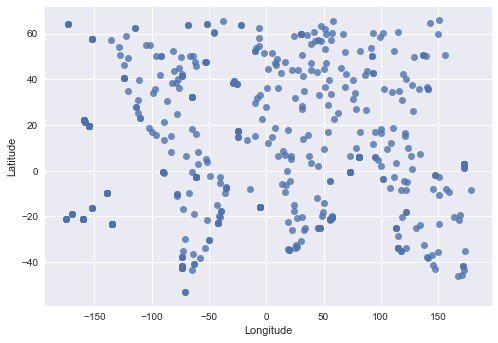

In [9]:
p = sns.regplot(x="Longitude", y="Latitude", data=sorted, fit_reg=False)
plt.show()

/Users/jakram/anaconda/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


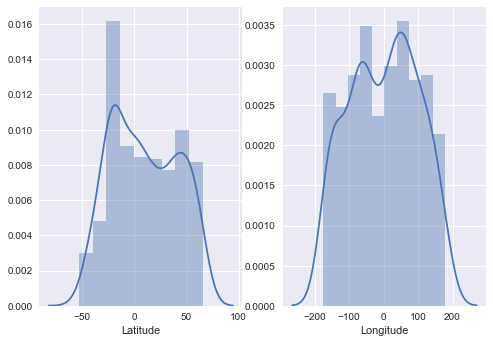

In [29]:
fig, axs = plt.subplots(nrows=1, ncols=2)


sns.distplot(sorted['Latitude'],  ax=axs[0])
sns.distplot(sorted['Longitude'],  ax=axs[1])
plt.show()

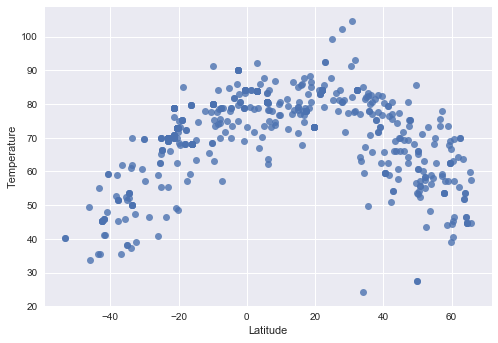

In [12]:
p = sns.regplot(x="Latitude", y="Temperature", data=sorted, fit_reg=False)
plt.show()

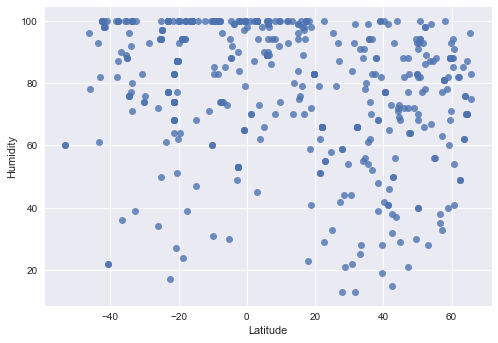

In [13]:
p = sns.regplot(x="Latitude", y="Humidity", data=sorted, fit_reg=False)
plt.show()

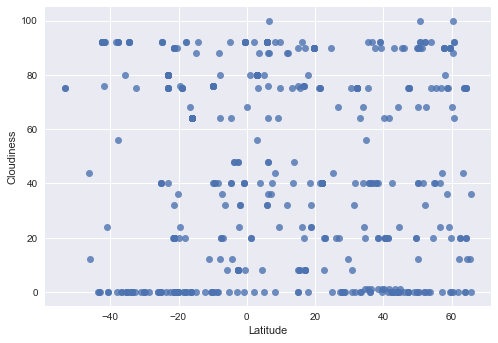

In [16]:
p = sns.regplot(x="Latitude", y="Cloudiness", data=sorted, fit_reg=False)
plt.show()